In [3]:
'''60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，
”United States”の単語ベクトルを表示せよ．
ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．'''
# !pip install gensim
# !pip install sklearn
# !pip install matplotlib

from gensim import models

wordvec = models.KeyedVectors.load_word2vec_format('data/ch7/GoogleNews-vectors-negative300.bin.gz', binary=True)

print(wordvec['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [12]:
'''61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．'''

wordvec.similarity('United_States', 'U.S.')

0.73107743

In [13]:
'''62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．'''

wordvec.similar_by_word('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [14]:
'''63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，
”Athens”のベクトルを足したベクトルを計算し，
そのベクトルと類似度の高い10語とその類似度を出力せよ'''
import pprint

result = wordvec.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'],topn=10)

pprint.pprint(result)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]


In [15]:
'''64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，
vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し
，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．
求めた単語と類似度は，各事例の末尾に追記せよ．'''
import pandas as pd
from tqdm import tqdm_notebook

df = pd.read_csv('data/ch7/questions-words.txt', sep=' ')
df = df.reset_index()
df.columns = ['vector1','vector2','vector3','vector4']

n = 10000

for index, row in tqdm_notebook(df.iterrows()):
    if index==n:
        break
    try:
        result = wordvec.most_similar(positive=[row['vector2'],row['vector3']], negative=[row['vector1']],topn=1)[0]
        df.at[index,'vector5']  = result[0]
        df.at[index,'vector6']  = result[1]
    except:
        pass
    
print(df)
df.to_csv('data/ch7/64ans.txt', index=False, sep=' ', header=None)

      vector1 vector2  vector3      vector4      vector5   vector6
0      Athens  Greece  Baghdad         Iraq        Iraqi  0.635187
1      Athens  Greece  Bangkok     Thailand     Thailand  0.713767
2      Athens  Greece  Beijing        China        China  0.723578
3      Athens  Greece   Berlin      Germany      Germany  0.673462
4      Athens  Greece     Bern  Switzerland  Switzerland  0.491975
...       ...     ...      ...          ...          ...       ...
19552   write  writes     talk        talks          NaN       NaN
19553   write  writes    think       thinks          NaN       NaN
19554   write  writes   vanish     vanishes          NaN       NaN
19555   write  writes     walk        walks          NaN       NaN
19556   write  writes     work        works          NaN       NaN

[19557 rows x 6 columns]


In [16]:
'''65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）
の正解率を測定せよ．'''

df = pd.read_csv('data/ch7/64ans.txt', sep=' ', header=None)
df.columns = ['vector1','vector2','vector3','vector4','vector5','vector6']

# calculate items if not equals to NaN (if num!=num, num=NaN)
print("analogy: ",(df['vector4'] == df['vector5']).sum() / (df['vector5']==df['vector5']).sum())

analogy:  0.6817090254152491


In [17]:
'''66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，
単語ベクトルにより計算される類似度のランキングと，
人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．'''

df = pd.read_csv('data/ch7/combined.csv')
for index, row in df.iterrows():
    similarity = wordvec.similarity(row['Word 1'], row['Word 2'])
    df.at[index,'cosim'] = similarity

print(df[['Human (mean)', 'cosim']].corr(method='spearman'))

              Human (mean)     cosim
Human (mean)      1.000000  0.700017
cosim             0.700017  1.000000


In [4]:
'''67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，
k-meansクラスタリングをクラスタ数k=5として実行せよ．'''
# country name list
#https://gist.github.com/kalinchernev/486393efcca01623b18d

import numpy as np
from sklearn.cluster import KMeans

countries = []
countries_vec = []
for line in open('data/ch7/countries.txt'):
    if line.rstrip() in wordvec:
        countries.append(line.rstrip())
        countries_vec.append(wordvec[line.rstrip()])

X = np.array(countries_vec)
kmeans = KMeans(n_clusters=5, random_state=0)
km_pred = kmeans.fit_predict(X)
for i in zip(countries, km_pred):
    print(i,end=' ')

('Afghanistan', 1) ('Albania', 0) ('Algeria', 2) ('Andorra', 0) ('Angola', 2) ('Argentina', 4) ('Armenia', 0) ('Australia', 1) ('Austria', 0) ('Azerbaijan', 0) ('Bahamas', 3) ('Bahrain', 1) ('Bangladesh', 1) ('Barbados', 3) ('Belarus', 0) ('Belgium', 0) ('Belize', 3) ('Benin', 2) ('Bhutan', 1) ('Bolivia', 4) ('Botswana', 2) ('Brazil', 4) ('Brunei', 1) ('Bulgaria', 0) ('Burkina', 2) ('Burundi', 2) ('Cambodia', 1) ('Cameroon', 2) ('Canada', 1) ('Chad', 1) ('Chile', 4) ('China', 1) ('Colombia', 4) ('Comoros', 2) ('Congo', 2) ('Croatia', 0) ('Cuba', 4) ('Cyprus', 0) ('Denmark', 0) ('Djibouti', 2) ('Dominica', 3) ('Ecuador', 4) ('Egypt', 1) ('Eritrea', 2) ('Estonia', 0) ('Ethiopia', 2) ('Fiji', 3) ('Finland', 0) ('France', 0) ('Gabon', 2) ('Gambia', 2) ('Georgia', 0) ('Germany', 0) ('Ghana', 2) ('Greece', 0) ('Grenada', 3) ('Guatemala', 4) ('Guinea', 2) ('Guyana', 3) ('Haiti', 4) ('Honduras', 4) ('Hungary', 0) ('Iceland', 0) ('India', 1) ('Indonesia', 1) ('Iran', 1) ('Iraq', 1) ('Ireland', 

In [5]:
'''68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．
さらに，クラスタリング結果をデンドログラムとして可視化せよ．'''

import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16, 9))
plt.title("ward clustering")
dend = shc.dendrogram(shc.linkage(X, method='ward'), labels=countries)
plt.show()

<Figure size 1600x900 with 1 Axes>

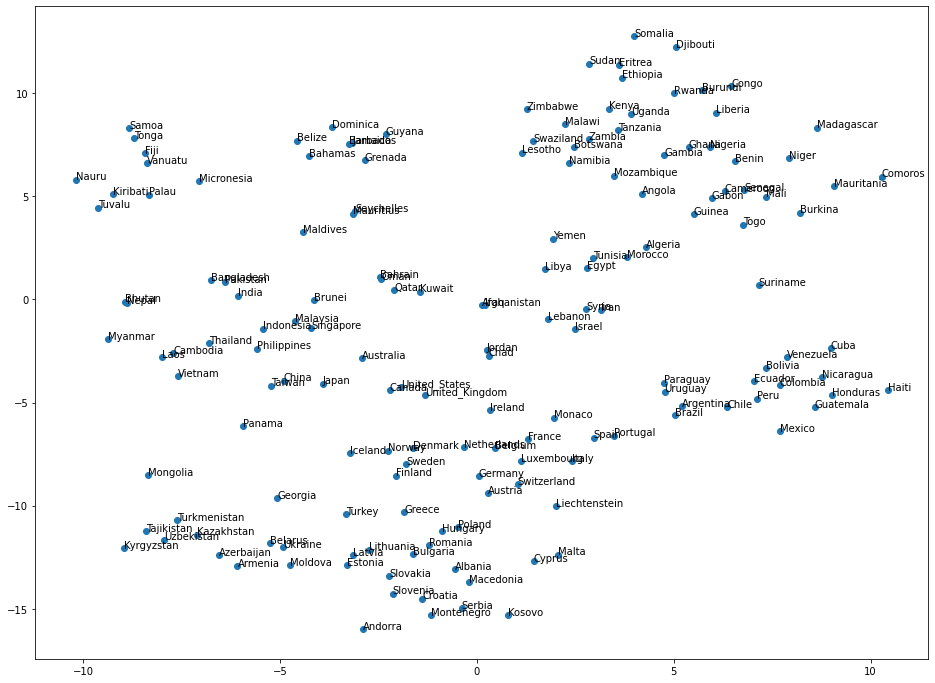

In [11]:
'''69. t-SNEによる可視化
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．'''

from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)
X_2d = tsne.fit_transform(X) # [[x1,y1],[x2,y2],[xn,yn]]
X_2d_t = list(zip(*X_2d))    # [[x(1~n)],[y(1~n)]]

fig, ax = plt.subplots(figsize=(16, 12))
plt.scatter(*X_2d_t)
for i, c in enumerate(countries):
    ax.annotate(c, (X_2d[i][0],X_2d[i][1]))